In [1]:
pip install pyspark==3.2.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.5/281.5 MB 5.2 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 kB 5.8 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.2.2-py2.py3-none-any.whl size=281969434 sha256=86d522088f15961fe9c7c0ee69414ecad41082b7171b70160a4b3e61e5164eb9
  Stored in directory: /home/jovyan/.cache/pip/wheels/84/42/fa/5339cf0197ee3f87cf713e440a581889f343da6d24e04e866a
Successfully built pyspark
Note: you may need to restart the kernel to use updated packages.


In [4]:
from pyspark.sql import SparkSession

In [5]:
spark = SparkSession.builder \
    .appName("Assignment") \
    .getOrCreate()

In [6]:
transactions = spark.read.csv("/home/jovyan/data//store_transactions.csv", header=True, inferSchema=True)
transactions


DataFrame[CustomerID: int, ProductID: int, Amount: int, Date: string]

In [7]:
customers = spark.read.csv("/home/jovyan/data//retailstore_5mn.csv", header=True, inferSchema=True)
customers

DataFrame[CustomerID: int, Age: double, Salary: int, Gender: string, Country: string]

In [8]:
transactions.show()
transactions.printSchema()

+----------+---------+------+----------+
|CustomerID|ProductID|Amount|      Date|
+----------+---------+------+----------+
|      3427|        3|  7541|22-11-2019|
|      4378|       14|  7271|15-12-2019|
|      3751|       47|  4276|20-11-2019|
|      6899|      146|  8923|22-11-2019|
|      4561|       46|  4891|30-11-2019|
|      2299|      143|  7545|05-12-2019|
|       553|       43|  1147|08-12-2019|
|      3406|      134|   245|12-12-2019|
|      5278|       34|  8765|09-12-2019|
|      2456|       68|  3820|30-11-2019|
|      6963|       58|  1850|27-11-2019|
|      4700|      140|  3948|27-11-2019|
|      3566|       76|   401|17-12-2019|
|      2212|       38|  4750|16-12-2019|
|      4677|       18|  1149|18-11-2019|
|      4295|       35|  3241|19-11-2019|
|      4228|       91|  6405|01-12-2019|
|      2466|       83|  2978|10-12-2019|
|      3136|       67|  6581|28-11-2019|
|      6563|       80|  2878|21-11-2019|
+----------+---------+------+----------+
only showing top

In [9]:
customers.show()
customers.printSchema()

+----------+-----------+------+------+-------+
|CustomerID|        Age|Salary|Gender|Country|
+----------+-----------+------+------+-------+
|         1|       18.0| 20000|  Male|Germany|
|         2|       19.0| 22000|Female| France|
|         3|       20.0| 24000|Female|England|
|         4|       21.0|  2600|  Male|England|
|         5|       22.0| 50000|  Male| France|
|         6|       23.0| 35000|Female|England|
|         7|       24.0|  4300|  Male|Germany|
|         8|       25.0| 32000|Female| France|
|         9|       35.0| 35000|  Male|Germany|
|        10|       27.0| 37000|Female| France|
|        11|       31.0| 25000|  Male|Germany|
|        12|32.38181818| 27000|Female| France|
|        13|33.76363636| 29000|Female|England|
|        14|35.14545455|  7600|  Male|England|
|        15|36.52727273| 55000|  Male| France|
|        16|37.90909091| 40000|Female|England|
|        17|39.29090909|  9300|  Male|Germany|
|        18|40.67272727| 37000|Female| France|
|        19|4

In [10]:

from pyspark.sql.functions import col

In [11]:
## to make sure the column customer id in both datasets is of the same data type. we are casting the columns as string because its safer and no mathematical operations is allowed in the columns with IDs
transactions = transactions.withColumn("CustomerID", col("CustomerID").cast("string"))
customers = customers.withColumn("CustomerID", col("CustomerID").cast("string"))

In [12]:
## combining two datasets using CustomerID keeping only matching customerIDs
retail = transactions.join(customers, on="CustomerID", how="inner")
retail.show(5)

+----------+---------+------+----------+----+------+------+-------+
|CustomerID|ProductID|Amount|      Date| Age|Salary|Gender|Country|
+----------+---------+------+----------+----+------+------+-------+
|         1|       41|  7363|12-12-2019|18.0| 20000|  Male|Germany|
|         1|        9|  6621|11-12-2019|18.0| 20000|  Male|Germany|
|         1|       95|  5870|02-12-2019|18.0| 20000|  Male|Germany|
|         1|       92|   358|01-12-2019|18.0| 20000|  Male|Germany|
|         1|       26|  9162|29-11-2019|18.0| 20000|  Male|Germany|
+----------+---------+------+----------+----+------+------+-------+
only showing top 5 rows



In [13]:
retail.describe().show()

+-------+------------------+------------------+------------------+----------+------------------+------------------+------+-------+
|summary|        CustomerID|         ProductID|            Amount|      Date|               Age|            Salary|Gender|Country|
+-------+------------------+------------------+------------------+----------+------------------+------------------+------+-------+
|  count|            512545|            512545|            512545|    512545|            512545|            512545|512545| 512545|
|   mean| 3510.169799724902| 50.47707030602191| 4985.914700172668|      NULL|55.033391303569154|  35313.2973690115|  NULL|   NULL|
| stddev|2015.3945609135437|28.871111427285967|2889.4312777274986|      NULL| 7.406810830690359|14990.171075136997|  NULL|   NULL|
|    min|                 1|                 1|                 1|01-12-2019|              18.0|              2600|Female|England|
|    max|               999|               146|             10000|30-11-2019|      

In [14]:
retail.printSchema() 

root
 |-- CustomerID: string (nullable = true)
 |-- ProductID: integer (nullable = true)
 |-- Amount: integer (nullable = true)
 |-- Date: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Salary: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Country: string (nullable = true)



In [15]:
## Converting Date from string variable to date format
from pyspark.sql.functions import to_date, year, month, dayofweek

retail = retail.withColumn("Date", to_date("Date", "dd-MM-yyyy"))

In [16]:
## to check the number of missing values in each column
from pyspark.sql.functions import col
for column in retail.columns:
    null_count = retail.filter(col(column).isNull()).count()
    print(f"{column} has {null_count} null values")

CustomerID has 0 null values
ProductID has 0 null values
Amount has 0 null values
Date has 0 null values
Age has 0 null values
Salary has 0 null values
Gender has 0 null values
Country has 0 null values


In [17]:
### To check the number of duplicates
# Count total rows
total_rows = retail.count()

# Count unique rows
unique_rows = retail.distinct().count()

# Calculate number of duplicate rows
duplicate_rows = total_rows - unique_rows

# Print the results
print("Total Rows:", total_rows)
print("Unique Rows:", unique_rows)
print("Duplicate Rows:", duplicate_rows)


Total Rows: 512545
Unique Rows: 102509
Duplicate Rows: 410036


In [18]:
from pyspark.sql.functions import count

# Find duplicated rows by grouping all columns and counting occurrences
duplicates = (
    retail.groupBy(retail.columns)  # group by all columns
      .count()              # count how many times each row appears
      .filter("count > 1")  # keep only rows that appear more than once
)

# Show the duplicated rows (with their counts)
duplicates.show()

+----------+---------+------+----------+-----------+------+------+-------+-----+
|CustomerID|ProductID|Amount|      Date|        Age|Salary|Gender|Country|count|
+----------+---------+------+----------+-----------+------+------+-------+-----+
|         6|       15|  7466|2019-12-02|       23.0| 35000|Female|England|    5|
|        24|       89|  4733|2019-12-17|48.96363636| 12600|Female|Germany|    5|
|        32|       64|  2941|2019-12-12|60.01818182| 37000|  Male|England|    5|
|        33|       73|  6565|2019-12-13|       61.4| 39000|  Male|England|    5|
|        38|       32|  3341|2019-11-25|       18.0| 29000|  Male|England|    5|
|        73|       12|  2004|2019-12-10|65.54545455| 34000|  Male|Germany|    5|
|        75|       61|  7227|2019-12-13|43.43636364| 60000|  Male|Germany|    5|
|        78|       60|  5342|2019-12-13|47.58181818| 42000|  Male|England|    5|
|        85|       75|  3450|2019-11-18|57.25454545| 65000|  Male| France|    5|
|       114|       72|  3116

In [19]:
from pyspark.sql.functions import countDistinct

# Count how many different products each customer bought
distinct_products_per_customer = retail.groupBy("CustomerID") \
                                   .agg(countDistinct("ProductID").alias("distinct_product_count"))

# Show customers who bought more than 1 unique product
distinct_products_per_customer.filter("distinct_product_count > 1").show()

+----------+----------------------+
|CustomerID|distinct_product_count|
+----------+----------------------+
|      1572|                    16|
|      2904|                    12|
|      3210|                    12|
|       467|                    11|
|      1090|                    13|
|      3959|                    14|
|      4937|                    15|
|      1436|                    17|
|      4821|                    12|
|      6731|                    16|
|      1159|                    10|
|      1512|                     9|
|       296|                    14|
|      6194|                    15|
|      5325|                     9|
|       675|                    10|
|      2088|                    14|
|      4032|                     8|
|      2069|                    15|
|      3606|                    14|
+----------+----------------------+
only showing top 20 rows



In [20]:
# Get only customers with multiple product purchases
multi_product_customers = distinct_products_per_customer.filter("distinct_product_count > 1")

# Join with original dataset to see those transactions
df_multi_products = retail.join(multi_product_customers, on="CustomerID", how="inner")

df_multi_products.show()

+----------+---------+------+----------+-----------+------+------+-------+----------------------+
|CustomerID|ProductID|Amount|      Date|        Age|Salary|Gender|Country|distinct_product_count|
+----------+---------+------+----------+-----------+------+------+-------+----------------------+
|       296|       52|  8815|2019-12-17|50.34545455| 30000|  Male|Germany|                    14|
|       296|       96|  8355|2019-11-28|50.34545455| 30000|  Male|Germany|                    14|
|       296|       10|  8203|2019-12-04|50.34545455| 30000|  Male|Germany|                    14|
|       296|       68|  4045|2019-11-28|50.34545455| 30000|  Male|Germany|                    14|
|       296|       19|  6188|2019-11-27|50.34545455| 30000|  Male|Germany|                    14|
|       296|       41|  6842|2019-12-01|50.34545455| 30000|  Male|Germany|                    14|
|       296|       92|   736|2019-12-14|50.34545455| 30000|  Male|Germany|                    14|
|       296|       7

In [21]:
from pyspark.sql.functions import sum

retail_agg = retail.groupBy("CustomerID").agg(sum("Amount").alias("TotalAmountSpent"))
retail_agg.show()

+----------+----------------+
|CustomerID|TotalAmountSpent|
+----------+----------------+
|       296|          362015|
|       467|          249815|
|       675|          267405|
|       691|          459750|
|       829|          320020|
|      1090|          386075|
|      1159|          301920|
|      1436|          412925|
|      1512|          274245|
|      1572|          449855|
|      2069|          539460|
|      2088|          281745|
|      2136|          656625|
|      2162|          249475|
|      2294|          372415|
|      2904|          287505|
|      3210|          221945|
|      3414|          345550|
|      3606|          405530|
|      3959|          427515|
+----------+----------------+
only showing top 20 rows



In [22]:
## Since a customer can appear many times in the dataset because of multiple purchases
## duplicates by CustomerID we therefore can aggregate the data per customer to create one row per customer making it suitable for regression modeling.
from pyspark.sql.functions import sum, avg, count, countDistinct
transactions_agg = retail.groupBy("CustomerID").agg(
    sum("Amount").alias("Totalamount"),
    avg("Amount").alias("Avgamount"),
    count("Amount").alias("Transactioncount"),
    countDistinct("ProductID").alias("ProductCount")
)
## spending behavior,one row per customer

In [23]:
customer_info = retail.select("CustomerID", "Age", "Salary", "Gender", "Country").dropDuplicates(["CustomerID"])

In [24]:
customer_df = customer_info.join(transactions_agg, on="CustomerID", how="inner")

In [25]:
##How much each customer spent, how often they shopped (transaction count) and how many different products they bought(productcount)
customer_df.show()

+----------+-----------+------+------+-------+-----------+------------------+----------------+------------+
|CustomerID|        Age|Salary|Gender|Country|Totalamount|         Avgamount|Transactioncount|ProductCount|
+----------+-----------+------+------+-------+-----------+------------------+----------------+------------+
|      1572|47.58181818| 32000|  Male|England|     449855| 5292.411764705882|              85|          16|
|      2904|47.58181818| 45000|Female|Germany|     287505|           4791.75|              60|          12|
|      3210|47.58181818| 65000|  Male| France|     221945|3414.5384615384614|              65|          12|
|       467|62.78181818|  9300|Female|Germany|     249815| 4542.090909090909|              55|          11|
|      1090|53.10909091| 55000|  Male| France|     386075| 5939.615384615385|              65|          13|
|      3959|62.78181818| 17600|Female|England|     427515|         5343.9375|              80|          14|
|      4937|       46.2| 193

In [26]:
customer_df.describe().show()

+-------+------------------+------------------+------------------+------+-------+------------------+-----------------+------------------+------------------+
|summary|        CustomerID|               Age|            Salary|Gender|Country|       Totalamount|        Avgamount|  Transactioncount|      ProductCount|
+-------+------------------+------------------+------------------+------+-------+------------------+-----------------+------------------+------------------+
|  count|              7000|              7000|              7000|  7000|   7000|              7000|             7000|              7000|              7000|
|   mean|            3500.5| 55.03751688351747|35367.671428571426|  NULL|   NULL| 365072.2357142857|4984.317739110541| 73.22071428571428|13.634714285714285|
| stddev|2020.8702745764415|7.4130797545714255|15002.106029438495|  NULL|   NULL|108164.89326654827|774.4816010950908|18.538214052556498| 3.329608529575032|
|    min|                 1|              18.0|           

In [27]:
##encoding of gender and country columns
from pyspark.ml.feature import StringIndexer
Gender_label = StringIndexer(inputCol="Gender", outputCol="Genderlabel")
Country_label = StringIndexer(inputCol="Country", outputCol="Countrylabel")

In [28]:
customers_df = Gender_label.fit(customer_df).transform(customer_df)
customers_df = Country_label.fit(customers_df).transform(customers_df)

In [29]:
customers_df.show()

+----------+-----------+------+------+-------+-----------+------------------+----------------+------------+-----------+------------+
|CustomerID|        Age|Salary|Gender|Country|Totalamount|         Avgamount|Transactioncount|ProductCount|Genderlabel|Countrylabel|
+----------+-----------+------+------+-------+-----------+------------------+----------------+------------+-----------+------------+
|      1572|47.58181818| 32000|  Male|England|     449855| 5292.411764705882|              85|          16|        0.0|         0.0|
|      2904|47.58181818| 45000|Female|Germany|     287505|           4791.75|              60|          12|        1.0|         2.0|
|      3210|47.58181818| 65000|  Male| France|     221945|3414.5384615384614|              65|          12|        0.0|         1.0|
|       467|62.78181818|  9300|Female|Germany|     249815| 4542.090909090909|              55|          11|        1.0|         2.0|
|      1090|53.10909091| 55000|  Male| France|     386075| 5939.61538

In [30]:
from pyspark.ml.feature import VectorAssembler, StandardScaler
assembler = VectorAssembler(
    inputCols=["Age", "Salary", "Avgamount", "Transactioncount", "ProductCount"],
    outputCol="features"
)

df = assembler.transform(customers_df)

# Step 2: Apply StandardScaler to scale the numeric features
scaler = StandardScaler(inputCol="features", outputCol="features_scaled", withMean=True, withStd=True)

scaler_model = scaler.fit(df)
df_scaled = scaler_model.transform(df)

# Show result with scaled features
df_scaled.select("Age", "Salary", "Avgamount", "Transactioncount", "ProductCount", "features_scaled").show(5, truncate=False)


+-----------+------+------------------+----------------+------------+----------------------------------------------------------------------------------------------------+
|Age        |Salary|Avgamount         |Transactioncount|ProductCount|features_scaled                                                                                     |
+-----------+------+------------------+----------------+------------+----------------------------------------------------------------------------------------------------+
|47.58181818|32000 |5292.411764705882 |85              |16          |[-1.0057491555947848,-0.22447991115136445,0.3978067718583753,0.6354056372901469,0.7103795215792482] |
|47.58181818|45000 |4791.75           |60              |12          |[-1.0057491555947848,0.6420650908963608,-0.248640818372254,-0.71316008371858,-0.4909629078596032]   |
|47.58181818|65000 |3414.5384615384614|65              |12          |[-1.0057491555947848,1.975211247892861,-2.026877430467629,-0.443446939516834

In [31]:
df_scaled.show()

+----------+-----------+------+------+-------+-----------+------------------+----------------+------------+-----------+------------+--------------------+--------------------+
|CustomerID|        Age|Salary|Gender|Country|Totalamount|         Avgamount|Transactioncount|ProductCount|Genderlabel|Countrylabel|            features|     features_scaled|
+----------+-----------+------+------+-------+-----------+------------------+----------------+------------+-----------+------------+--------------------+--------------------+
|      1572|47.58181818| 32000|  Male|England|     449855| 5292.411764705882|              85|          16|        0.0|         0.0|[47.58181818,3200...|[-1.0057491555947...|
|      2904|47.58181818| 45000|Female|Germany|     287505|           4791.75|              60|          12|        1.0|         2.0|[47.58181818,4500...|[-1.0057491555947...|
|      3210|47.58181818| 65000|  Male| France|     221945|3414.5384615384614|              65|          12|        0.0|      

In [32]:
spark.conf.get("spark.sql.catalogImplementation")

'in-memory'

In [37]:
dataframes = {
    "transactions": transactions,
    "customers": customers,
    "retail": retail,
    "customer_df": customer_df,
    "customers_df": customers_df,
    "df_scaled": df_scaled
}

base_path = "/home/jovyan/data"  # Unix-style absolute path

for name, df in dataframes.items():
    save_path = f"{base_path}/{name}"
    df.write.mode("overwrite").parquet(save_path)
    print(f"Saved {name} to {save_path}")

Saved transactions to /home/jovyan/data/transactions
Saved customers to /home/jovyan/data/customers
Saved retail to /home/jovyan/data/retail
Saved customer_df to /home/jovyan/data/customer_df
Saved customers_df to /home/jovyan/data/customers_df
Saved df_scaled to /home/jovyan/data/df_scaled


In [38]:
spark.stop()

In [39]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("assignment2") \
    .enableHiveSupport() \
    .getOrCreate()

In [40]:
transactions = spark.read.parquet("/home/jovyan/data/transactions")
customers = spark.read.parquet("/home/jovyan/data/customers")
retail = spark.read.parquet("/home/jovyan/data/retail")
customer_df = spark.read.parquet("/home/jovyan/data/customer_df")
customers_df = spark.read.parquet("/home/jovyan/data/customers_df")
df_scaled = spark.read.parquet("/home/jovyan/data/df_scaled")

In [41]:
## creating Spark SQL temporary views called "Spark tables"
transactions.createOrReplaceTempView("transactions_view")
customers.createOrReplaceTempView("customers_view")
retail.createOrReplaceTempView("retail_view")
customer_df.createOrReplaceTempView("customer_df_view")
customers_df.createOrReplaceTempView("customers_df_view")
df_scaled.createOrReplaceTempView("df_scaled_view")

In [42]:
## creating a managed Hive table in your Hive warehouse directory
spark.sql("CREATE TABLE IF NOT EXISTS transactions AS SELECT * FROM transactions_view")
spark.sql("CREATE TABLE IF NOT EXISTS customers AS SELECT * FROM customers_view")
spark.sql("CREATE TABLE IF NOT EXISTS retail AS SELECT * FROM retail_view")
spark.sql("CREATE TABLE IF NOT EXISTS customer_df AS SELECT * FROM customer_df_view")
spark.sql("CREATE TABLE IF NOT EXISTS customers_df AS SELECT * FROM customers_df_view")
spark.sql("CREATE TABLE IF NOT EXISTS df_scaled AS SELECT * FROM df_scaled_view")

DataFrame[]

In [45]:
##total customers
spark.sql("SELECT COUNT(*) AS total_customers FROM customers").show()

+---------------+
|total_customers|
+---------------+
|        5015737|
+---------------+



In [46]:
## summary statistics for numerical features from customers table
spark.sql("""
SELECT
  MIN(Age) AS min_age,
  MAX(Age) AS max_age,
  AVG(Age) AS avg_age,
  MIN(Salary) AS min_salary,
  MAX(Salary) AS max_salary,
  AVG(Salary) AS avg_salary
FROM customers
""").show()

+-------+-----------+-----------------+----------+----------+------------------+
|min_age|    max_age|          avg_age|min_salary|max_salary|        avg_salary|
+-------+-----------+-----------------+----------+----------+------------------+
|   18.0|66.92727273|55.18083149135931|      2600|     65000|35387.864435475785|
+-------+-----------+-----------------+----------+----------+------------------+



In [52]:
# 5 High value customers by total amount spent
spark.sql("""
SELECT CustomerID, Totalamount
FROM customers_df
ORDER BY Totalamount DESC
LIMIT 5
""").show()

+----------+-----------+
|CustomerID|Totalamount|
+----------+-----------+
|      5293|     851920|
|      5535|     789600|
|      4201|     783685|
|      1293|     774900|
|      1087|     754555|
+----------+-----------+



In [54]:

# Total amount spent by country
spark.sql("""
SELECT Country, SUM(Totalamount) AS total_spent
FROM customers_df
GROUP BY Country
ORDER BY total_spent DESC
""").show()

+-------+-----------+
|Country|total_spent|
+-------+-----------+
|England| 1154275115|
| France|  729342780|
|Germany|  671887755|
+-------+-----------+



In [55]:
import time

def time_query(sql_query):
    start_time = time.time()
    spark.sql(sql_query).show()
    end_time = time.time()
    duration = end_time - start_time
    print(f"Query took {duration:.4f} seconds\n")
    return duration

In [60]:
print("### Spark SQL on Temporary Views ###")

query1 = "SELECT COUNT(*) AS total_customers FROM customers_view"
query2 = """
SELECT Country, SUM(Totalamount) AS total_spent 
FROM customers_df_view 
GROUP BY Country 
ORDER BY total_spent DESC
"""

time_query(query1)
time_query(query2)


### Spark SQL on Temporary Views ###
+---------------+
|total_customers|
+---------------+
|        5015737|
+---------------+

Query took 0.1863 seconds

+-------+-----------+
|Country|total_spent|
+-------+-----------+
|England| 1154275115|
| France|  729342780|
|Germany|  671887755|
+-------+-----------+

Query took 0.1658 seconds



0.16578030586242676

In [61]:
print("### Hive SQL on Hive Managed Tables ###")

query1_hive = "SELECT COUNT(*) AS total_customers FROM customers"
query2_hive = """
SELECT Country, SUM(Totalamount) AS total_spent 
FROM customers_df
GROUP BY Country 
ORDER BY total_spent DESC
"""
time_query(query1_hive)
time_query(query2_hive)

### Hive SQL on Hive Managed Tables ###
+---------------+
|total_customers|
+---------------+
|        5015737|
+---------------+

Query took 1.1874 seconds

+-------+-----------+
|Country|total_spent|
+-------+-----------+
|England| 1154275115|
| France|  729342780|
|Germany|  671887755|
+-------+-----------+

Query took 0.2221 seconds



0.2220766544342041

In [62]:
df_A = spark.sql(query1)
df_A.explain(True)

== Parsed Logical Plan ==
'Project ['COUNT(1) AS total_customers#5746]
+- 'UnresolvedRelation [customers_view], [], false

== Analyzed Logical Plan ==
total_customers: bigint
Aggregate [count(1) AS total_customers#5746L]
+- SubqueryAlias customers_view
   +- View (`customers_view`, [CustomerID#5118,Age#5119,Salary#5120,Gender#5121,Country#5122])
      +- Relation [CustomerID#5118,Age#5119,Salary#5120,Gender#5121,Country#5122] parquet

== Optimized Logical Plan ==
Aggregate [count(1) AS total_customers#5746L]
+- Project
   +- Relation [CustomerID#5118,Age#5119,Salary#5120,Gender#5121,Country#5122] parquet

== Physical Plan ==
AdaptiveSparkPlan isFinalPlan=false
+- HashAggregate(keys=[], functions=[count(1)], output=[total_customers#5746L])
   +- Exchange SinglePartition, ENSURE_REQUIREMENTS, [plan_id=10305]
      +- HashAggregate(keys=[], functions=[partial_count(1)], output=[count#5750L])
         +- FileScan parquet [] Batched: true, DataFilters: [], Format: Parquet, Location: InMemor

In [63]:
df_A = spark.sql(query1_hive)
df_A.explain(True)

== Parsed Logical Plan ==
'Project ['COUNT(1) AS total_customers#5751]
+- 'UnresolvedRelation [customers], [], false

== Analyzed Logical Plan ==
total_customers: bigint
Aggregate [count(1) AS total_customers#5751L]
+- SubqueryAlias spark_catalog.default.customers
   +- HiveTableRelation [`spark_catalog`.`default`.`customers`, org.apache.hadoop.hive.serde2.lazy.LazySimpleSerDe, Data Cols: [CustomerID#5753, Age#5754, Salary#5755, Gender#5756, Country#5757], Partition Cols: []]

== Optimized Logical Plan ==
Aggregate [count(1) AS total_customers#5751L]
+- Project
   +- HiveTableRelation [`spark_catalog`.`default`.`customers`, org.apache.hadoop.hive.serde2.lazy.LazySimpleSerDe, Data Cols: [CustomerID#5753, Age#5754, Salary#5755, Gender#5756, Country#5757], Partition Cols: []]

== Physical Plan ==
AdaptiveSparkPlan isFinalPlan=false
+- HashAggregate(keys=[], functions=[count(1)], output=[total_customers#5751L])
   +- Exchange SinglePartition, ENSURE_REQUIREMENTS, [plan_id=10318]
      +- H

In [64]:
start_time = time.time()
spark.sql(query1).show()
end_time = time.time()

print(f"Execution time: {end_time - start_time:.3f} seconds")

+---------------+
|total_customers|
+---------------+
|        5015737|
+---------------+

Execution time: 0.310 seconds


In [65]:
start_time = time.time()
spark.sql(query1_hive).show()
end_time = time.time()

print(f"Execution time: {end_time - start_time:.3f} seconds")

+---------------+
|total_customers|
+---------------+
|        5015737|
+---------------+

Execution time: 1.162 seconds


In [66]:
df_scaled.show()

+----------+-----------+------+------+-------+-----------+------------------+----------------+------------+-----------+------------+--------------------+--------------------+
|CustomerID|        Age|Salary|Gender|Country|Totalamount|         Avgamount|Transactioncount|ProductCount|Genderlabel|Countrylabel|            features|     features_scaled|
+----------+-----------+------+------+-------+-----------+------------------+----------------+------------+-----------+------------+--------------------+--------------------+
|      1572|47.58181818| 32000|  Male|England|     449855| 5292.411764705882|              85|          16|        0.0|         0.0|[47.58181818,3200...|[-1.0057491555947...|
|      2904|47.58181818| 45000|Female|Germany|     287505|           4791.75|              60|          12|        1.0|         2.0|[47.58181818,4500...|[-1.0057491555947...|
|      3210|47.58181818| 65000|  Male| France|     221945|3414.5384615384614|              65|          12|        0.0|      

In [67]:
retail_customer = df_scaled.select(
    "features_scaled", "Genderlabel", "Countrylabel", "Totalamount"
).toPandas()

In [68]:

# Unpack vector column into multiple features
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
features_array = np.array(retail_customer['features_scaled'].tolist())

# Combine with categorical
X = np.hstack([features_array, retail_customer[["Genderlabel", "Countrylabel"]].values])
y = retail_customer["Totalamount"]

In [70]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.4/322.4 MB 4.2 MB/s eta 0:00:00:00:0100:01


In [77]:
##TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [81]:
numeric_features = ["Age", "Salary", "Avgamount", "Transactioncount", "ProductCount"]
categorical_features = ["Genderlabel", "Countrylabel"]
features = numeric_features + categorical_features

# Convert to DataFrames
X_train = pd.DataFrame(X_train, columns=features)
X_test = pd.DataFrame(X_test, columns=features)

In [82]:
## applying recursive feature elimination with cross validation for feature importance
from sklearn.feature_selection import RFECV
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Initialize model
xgb = XGBRegressor(random_state=42)

# RFECV
rfecv = RFECV(estimator=xgb, step=1, cv=5, scoring='neg_root_mean_squared_error')
rfecv.fit(X_train, y_train)

# Select features using mask
X_train_selected = X_train.loc[:, rfecv.support_]
X_test_selected = X_test.loc[:, rfecv.support_]

In [83]:
print("Selected Features:", X_train_selected.columns.tolist())

Selected Features: ['Avgamount', 'Transactioncount']


In [84]:
## apllying grid search CV for hyper parameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7]
}

grid = GridSearchCV(
    XGBRegressor(objective='reg:squarederror', random_state=42),
    param_grid,
    scoring='neg_root_mean_squared_error',
    cv=5,
    n_jobs=-1
)

grid.fit(X_train_selected, y_train)
print("Best parameters:", grid.best_params_)

Best parameters: {'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 200}


In [92]:
## performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred = grid.predict(X_test_selected)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"Test RMSE: {rmse:.2f}")
print(f"Test R² Score: {r2:.4f}")

MAE: 873.06
Test RMSE: 2128.49
Test R² Score: 0.9996


In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

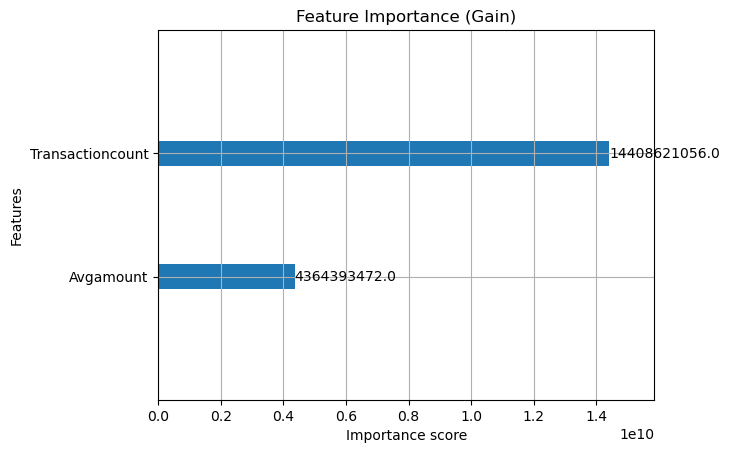

In [94]:
from xgboost import plot_importance
xgb_best = grid.best_estimator_
plot_importance(xgb_best, importance_type='gain')
plt.title("Feature Importance (Gain)")
plt.show()

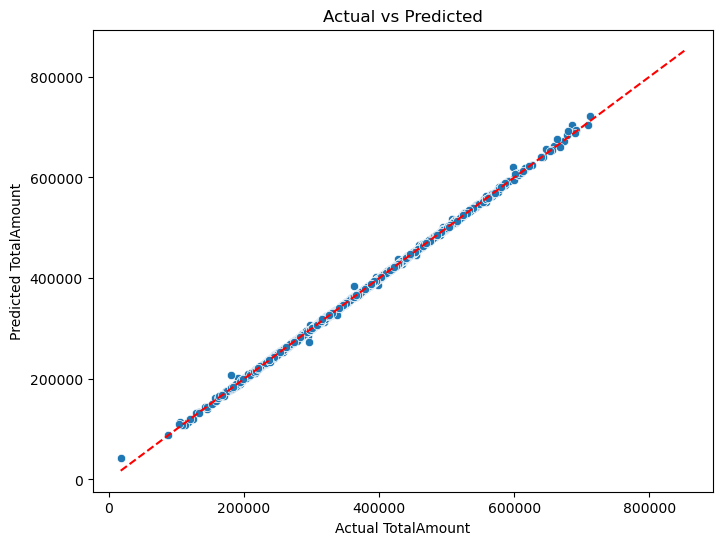

In [90]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual TotalAmount")
plt.ylabel("Predicted TotalAmount")
plt.title("Actual vs Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

In [95]:
## to check wether there's overfitting
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

print("Cross-validated R² scores:", cv_scores)
print("Mean CV R²:", np.mean(cv_scores))

Cross-validated R² scores: [0.9989998  0.99900279 0.99876573 0.9992532  0.99771299]
Mean CV R²: 0.9987469024628345


In [96]:
##Conclusion: No signs of overfitting High and stable performance.good generalization ability.No significant performance drop across folds.